# Energy Consumption Exploratory Data Analysis (EDA)

In this notebook, we will perform a comprehensive data analysis of the worldwide energy consumption. The analysis will be divided into two main parts: Exploratory Data Analysis (EDA) and Predictive Analysis.

EDA is a fundamental step in the data analysis process. It allows us to understand the data we're working with, discover patterns, spot anomalies, test hypotheses, and check assumptions. Our primary goal in this part is to understand the data from various angles and summarize its main characteristics.

On the other hand, Predictive Analysis uses statistical techniques from predictive modeling, machine learning, and data mining that analyze current and historical facts to make predictions about future or otherwise unknown events. In this part, we will build a predictive model to predict some specific outcome.

Let's get started!

## Importing the nessary packages and dependencies

In [2]:
import pystan
import os

os.environ['NUMEXPR_MAX_THREADS'] = '12'


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset
df = pd.read_csv('Global.csv')

# Display the first few rows of the dataset
df.head()

,Entity,Code,Year,Oil (% equivalent primary energy),Coal (% equivalent primary energy),Solar (% equivalent primary energy),Nuclear (% equivalent primary energy),Hydro (% equivalent primary energy),Wind (% equivalent primary energy),Gas (% equivalent primary energy),Other renewables (% equivalent primary energy)
0,Africa,NaN,1965,47.700943,45.217560,NaN,0.0,5.747495,0.0,1.334005,NaN
1,Africa,NaN,1966,49.321323,43.132324,NaN,0.0,6.122062,0.0,1.424286,NaN
2,Africa,NaN,1967,48.639896,43.640987,NaN,0.0,6.325731,0.0,1.393385,NaN
3,Africa,NaN,1968,48.686360,42.971220,NaN,0.0,7.005293,0.0,1.337120,NaN
4,Africa,NaN,1969,48.322144,42.200966,NaN,0.0,7.956088,0.0,1.520800,NaN


In [5]:
# Check for missing values
df.isnull().sum()

Entity                                               0
Code                                              1311
Year                                                 0
Oil (% equivalent primary energy)                    0
Coal (% equivalent primary energy)                  26
Solar (% equivalent primary energy)                168
Nuclear (% equivalent primary energy)              320
Hydro (% equivalent primary energy)                  7
Wind (% equivalent primary energy)                 165
Gas (% equivalent primary energy)                   10
Other renewables (% equivalent primary energy)     144
dtype: int64

## Data Cleaning

Before we proceed with the analysis, we need to clean our data. This involves handling missing values and removing unnecessary columns. Here are the steps we'll take:

1. **Drop the 'Code' column**: The 'Code' column has a significant number of missing values and doesn't seem to provide valuable information for our analysis, so we'll remove it.
2. **Impute missing values**: For the other columns with missing values, we'll fill in the gaps. Since our data represents percentages of energy sources, it would be reasonable to fill missing values with 0, assuming that a missing value indicates that the energy source was not used.

In [6]:
# Drop the 'Code' column
df = df.drop(['Code'], axis=1)

# Impute missing values with 0
df = df.fillna(0)

# Check if there are any missing values left
df.isnull().sum()

Entity                                            0
Year                                              0
Oil (% equivalent primary energy)                 0
Coal (% equivalent primary energy)                0
Solar (% equivalent primary energy)               0
Nuclear (% equivalent primary energy)             0
Hydro (% equivalent primary energy)               0
Wind (% equivalent primary energy)                0
Gas (% equivalent primary energy)                 0
Other renewables (% equivalent primary energy)    0
dtype: int64

In [7]:
df.columns

Index(['Entity', 'Year', 'Oil (% equivalent primary energy)',
       'Coal (% equivalent primary energy)',
       'Solar (% equivalent primary energy)',
       'Nuclear (% equivalent primary energy)',
       'Hydro (% equivalent primary energy)',
       'Wind (% equivalent primary energy)',
       'Gas (% equivalent primary energy)',
       'Other renewables (% equivalent primary energy)'],
      dtype='object')

In [8]:
# Generate descriptive statistics
df.describe()

,Year,Oil (% equivalent primary energy),Coal (% equivalent primary energy),Solar (% equivalent primary energy),Nuclear (% equivalent primary energy),Hydro (% equivalent primary energy),Wind (% equivalent primary energy),Gas (% equivalent primary energy),Other renewables (% equivalent primary energy)
count,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000
mean,1993.834759,47.474969,18.364763,0.125837,3.019777,9.310223,0.427778,20.348678,0.744875
std,16.301699,19.668564,18.880673,0.468486,6.187345,11.944641,1.512532,19.152039,1.920949
min,1965.000000,7.663339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,34.260538,2.396498,0.000000,0.000000,1.189069,0.000000,5.239674,0.000000
50%,1994.000000,43.848567,13.508180,0.000000,0.000000,5.553007,0.000000,16.711511,0.108354
75%,2008.000000,59.299081,28.902091,0.003147,2.563404,11.436545,0.043751,27.985139,0.649330
max,2021.000000,100.000000,89.138725,5.999280,42.199856,72.310486,24.614344,91.942150,26.302740


Here are the descriptive statistics for our dataset:

* Year: The data spans from 1965 to 2021.
* Oil (% equivalent primary energy): The average percentage of energy derived from oil is about 47.47%, with a minimum of 7.66% and a maximum of 100%.
* Coal (% equivalent primary energy): The average percentage of energy derived from coal is about 18.36%, with a minimum of 0% and a maximum of 89.14%.
* Solar (% equivalent primary energy): The average percentage of energy derived from solar power is about 0.13%, with a minimum of 0% and a maximum of 6%.
* Nuclear (% equivalent primary energy): The average percentage of energy derived from nuclear power is about 3.02%, with a minimum of 0% and a maximum of 42.20%.
* Hydro (% equivalent primary energy): The average percentage of energy derived from hydro power is about 9.31%, with a minimum of 0% and a maximum of 72.31%.
* Wind (% equivalent primary energy): The average percentage of energy derived from wind power is about 0.43%, with a minimum of 0% and a maximum of 24.61%.
* Gas (% equivalent primary energy): The average percentage of energy derived from gas is about 20.35%, with a minimum of 0% and a maximum of 91.94%.
* Other renewables (% equivalent primary energy): The average percentage of energy derived from other renewable sources is about 0.74%, with a minimum of 0% and a maximum of 26.30%.


## Data Visualization

Visualizing our data can provide us with a clearer understanding of the data's underlying structure and trends. In this section, we'll create a series of plots to show the trends in energy usage over time for each energy source.

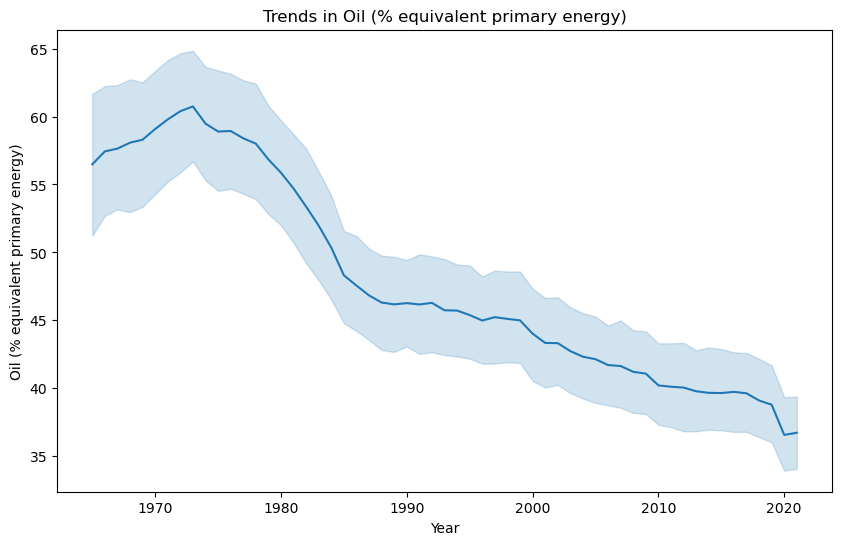

In [9]:
# Plot time series for 'Oil (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Oil (% equivalent primary energy)')
plt.title('Trends in Oil (% equivalent primary energy)')
plt.show()

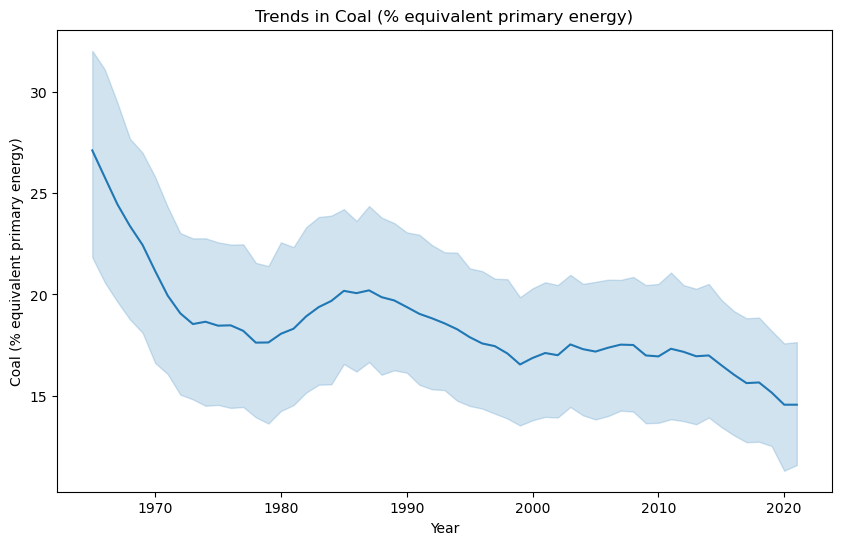

In [10]:
# Plot time series for 'Coal (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Coal (% equivalent primary energy)')
plt.title('Trends in Coal (% equivalent primary energy)')
plt.show()

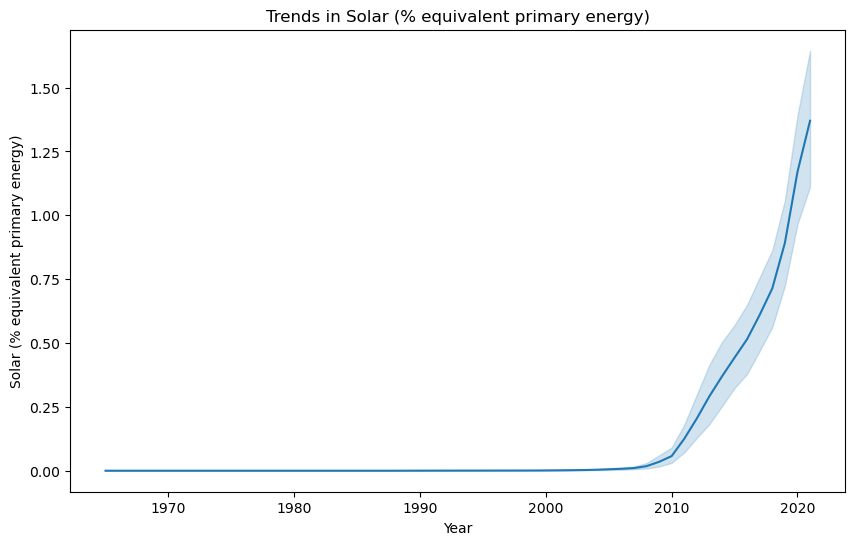

In [11]:
# Plot time series for 'Solar (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Solar (% equivalent primary energy)')
plt.title('Trends in Solar (% equivalent primary energy)')
plt.show()

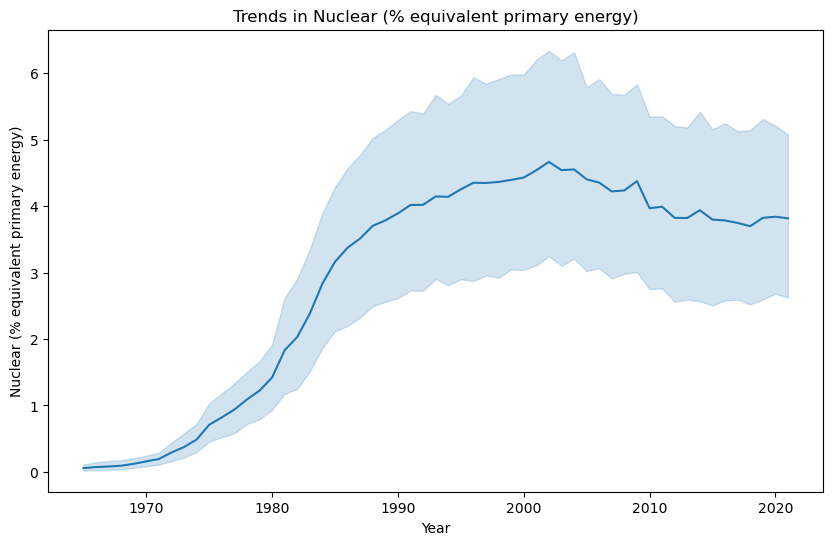

In [12]:
# Plot time series for 'Nuclear (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Nuclear (% equivalent primary energy)')
plt.title('Trends in Nuclear (% equivalent primary energy)')
plt.show()

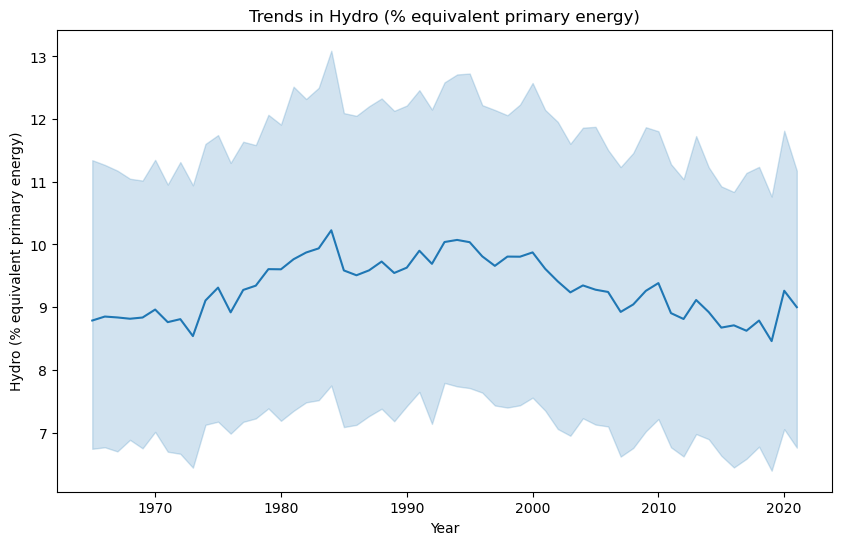

In [13]:
# Plot time series for 'Hydro (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Hydro (% equivalent primary energy)')
plt.title('Trends in Hydro (% equivalent primary energy)')
plt.show()

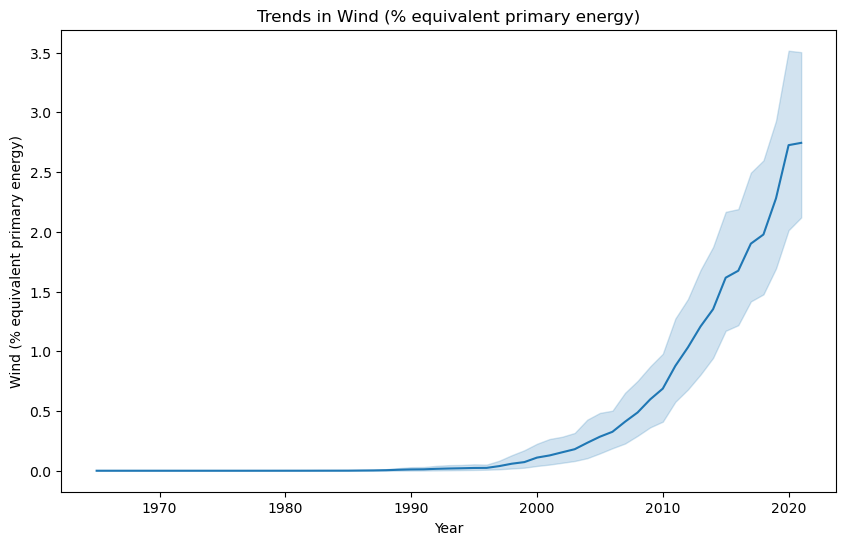

In [14]:
# Plot time series for 'Wind (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Wind (% equivalent primary energy)')
plt.title('Trends in Wind (% equivalent primary energy)')
plt.show()

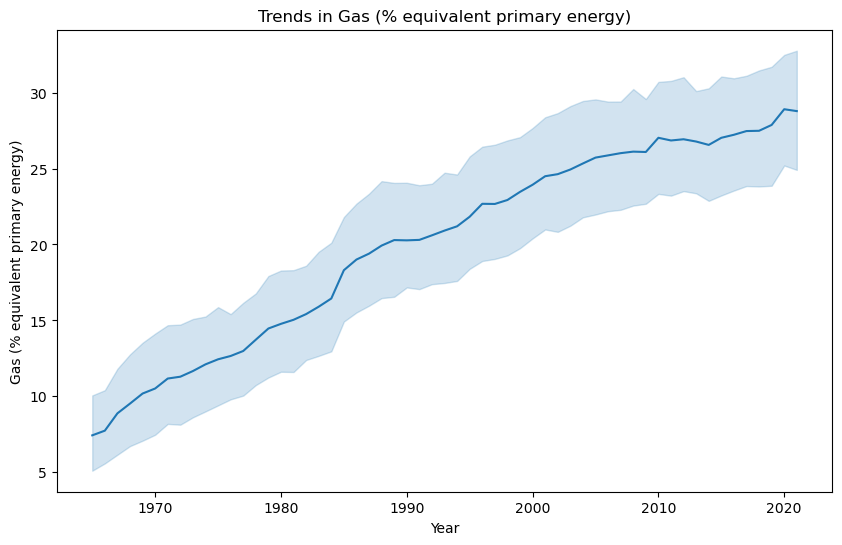

In [15]:
# Plot time series for 'Gas (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Gas (% equivalent primary energy)')
plt.title('Trends in Gas (% equivalent primary energy)')
plt.show()

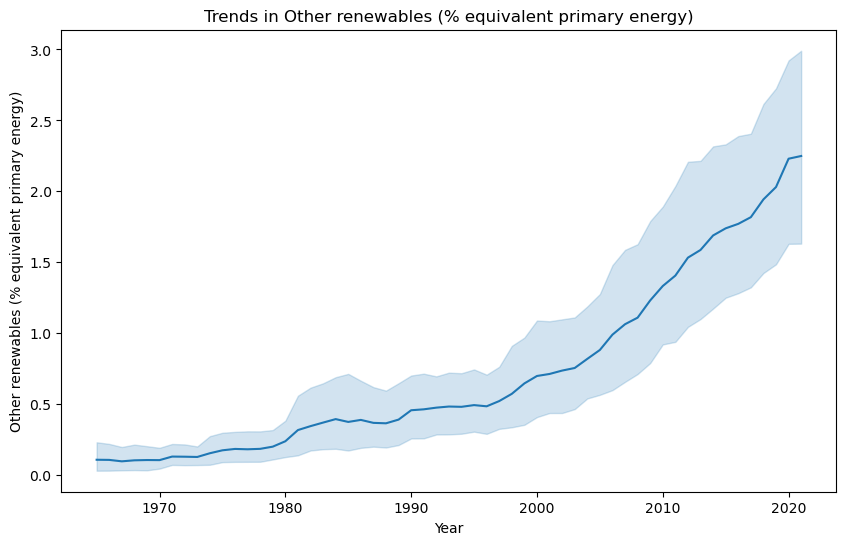

In [16]:
# Plot time series for 'Other renewables (% equivalent primary energy)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Other renewables (% equivalent primary energy)')
plt.title('Trends in Other renewables (% equivalent primary energy)')
plt.show()

**We have now visualized the trends in energy usage over time for each energy source. From the plots, we can observe that:**

* The use of oil as an energy source has been decreasing over time.
* The use of coal as an energy source has been relatively stable, with * some fluctuations.
* The use of solar energy has been increasing, especially in recent years.
* The use of nuclear energy has been relatively stable, with some * fluctuations.
* The use of hydro energy has been relatively stable, with some fluctuations.
* The use of wind energy has been increasing, especially in recent years.
* The use of gas as an energy source has been increasing over time.
* The use of other renewable energy sources has been increasing, especially in recent years.

## Now let's deep dive into the `Austraian` Energy Consumption over the years

In [17]:
# Extract data for Australia || Showing the early energy consumption
df_australia = df[df['Entity'] == 'Australia']
df_australia.head()


,Entity,Year,Oil (% equivalent primary energy),Coal (% equivalent primary energy),Solar (% equivalent primary energy),Nuclear (% equivalent primary energy),Hydro (% equivalent primary energy),Wind (% equivalent primary energy),Gas (% equivalent primary energy),Other renewables (% equivalent primary energy)
342,Australia,1965,46.979366,47.451090,0.0,0.0,5.340691,0.0,0.006923,0.221931
343,Australia,1966,47.981800,46.937496,0.0,0.0,4.868670,0.0,0.008810,0.203224
344,Australia,1967,49.543694,45.498450,0.0,0.0,4.753871,0.0,0.008307,0.195678
345,Australia,1968,50.884630,44.189198,0.0,0.0,4.686035,0.0,0.060709,0.179433
346,Australia,1969,50.236206,43.886940,0.0,0.0,4.915287,0.0,0.789869,0.171700


In [18]:
#Latest energy consumption by type
df_australia.tail()

,Entity,Year,Oil (% equivalent primary energy),Coal (% equivalent primary energy),Solar (% equivalent primary energy),Nuclear (% equivalent primary energy),Hydro (% equivalent primary energy),Wind (% equivalent primary energy),Gas (% equivalent primary energy),Other renewables (% equivalent primary energy)
394,Australia,2017,37.467420,32.589878,1.483013,0.0,2.245038,2.196989,23.192580,0.710472
395,Australia,2018,37.632416,31.388489,2.012569,0.0,2.825067,2.653817,22.679033,0.706503
396,Australia,2019,35.987343,28.970709,2.872721,0.0,2.201334,3.057155,26.161226,0.659339
397,Australia,2020,32.766630,29.400543,3.929338,0.0,2.376610,3.725680,27.043020,0.683158
398,Australia,2021,33.756210,28.508463,5.137179,0.0,2.634345,4.412902,24.801794,0.671845


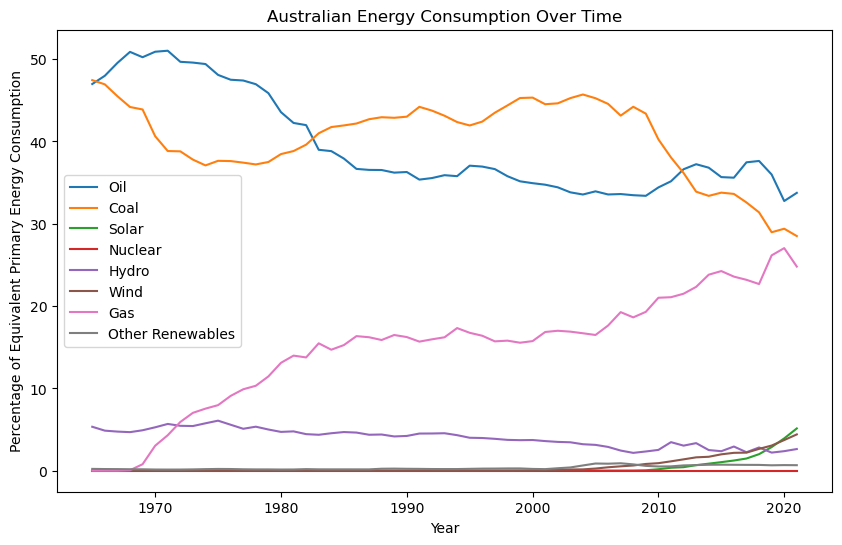

In [19]:

# Plotting each energy type on the same plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_australia, x='Year', y='Oil (% equivalent primary energy)', label='Oil')
sns.lineplot(data=df_australia, x='Year', y='Coal (% equivalent primary energy)', label='Coal')
sns.lineplot(data=df_australia, x='Year', y='Solar (% equivalent primary energy)', label='Solar')
sns.lineplot(data=df_australia, x='Year', y='Nuclear (% equivalent primary energy)', label='Nuclear')
sns.lineplot(data=df_australia, x='Year', y='Hydro (% equivalent primary energy)', label='Hydro')
sns.lineplot(data=df_australia, x='Year', y='Wind (% equivalent primary energy)', label='Wind')
sns.lineplot(data=df_australia, x='Year', y='Gas (% equivalent primary energy)', label='Gas')
sns.lineplot(data=df_australia, x='Year', y='Other renewables (% equivalent primary energy)', label='Other Renewables')

plt.title('Australian Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Equivalent Primary Energy Consumption')
plt.legend()
plt.show()





### Let's have a look at each energy type for better understanding 

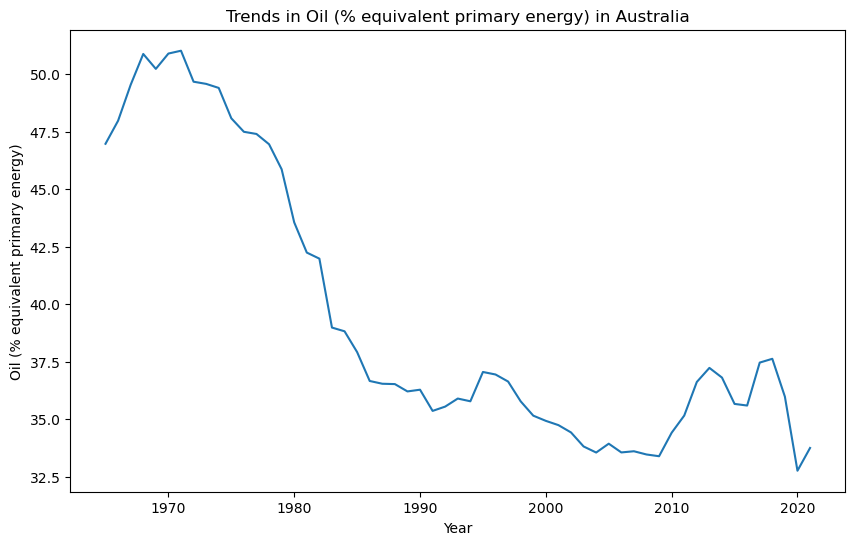

In [20]:
# Plot time series for 'Oil (% equivalent primary energy)' in Australia
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_australia, x='Year', y='Oil (% equivalent primary energy)')
plt.title('Trends in Oil (% equivalent primary energy) in Australia')
plt.show()

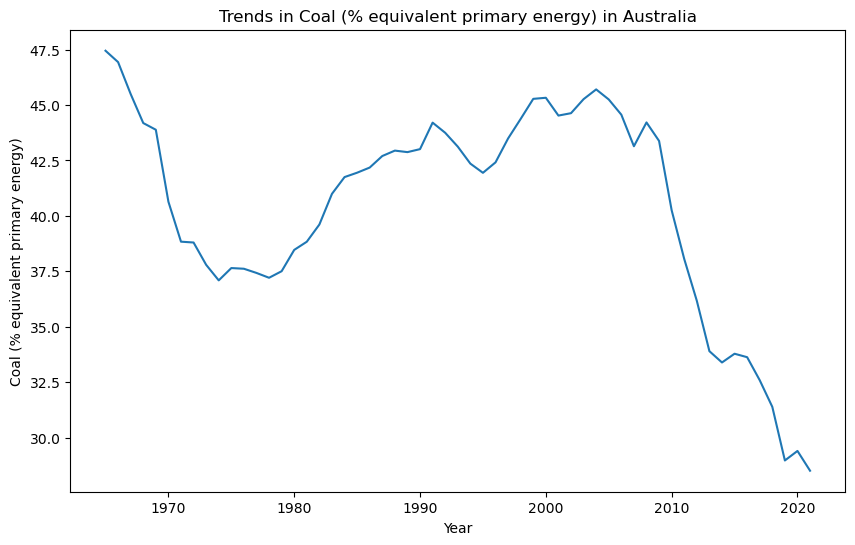

In [21]:
# Plot time series for 'Coal (% equivalent primary energy)' in Australia
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_australia, x='Year', y='Coal (% equivalent primary energy)')
plt.title('Trends in Coal (% equivalent primary energy) in Australia')
plt.show()

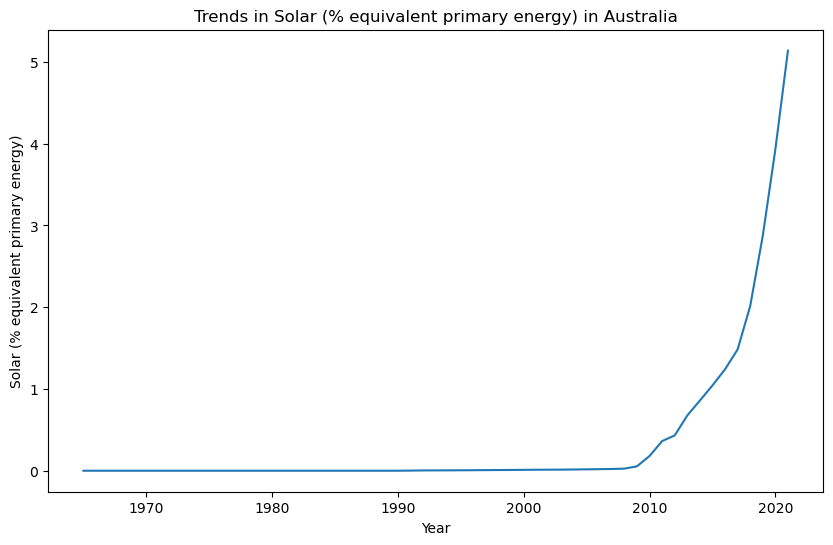

In [22]:
# Plot time series for 'Solar (% equivalent primary energy)' in Australia
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_australia, x='Year', y='Solar (% equivalent primary energy)')
plt.title('Trends in Solar (% equivalent primary energy) in Australia')
plt.show()

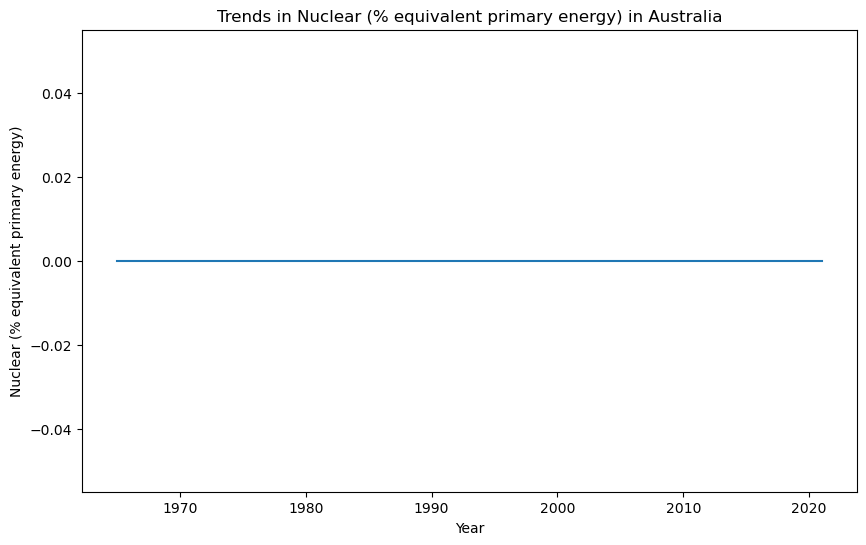

In [23]:
# Plot time series for 'Nuclear (% equivalent primary energy)' in Australia
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_australia, x='Year', y='Nuclear (% equivalent primary energy)')
plt.title('Trends in Nuclear (% equivalent primary energy) in Australia')
plt.show()

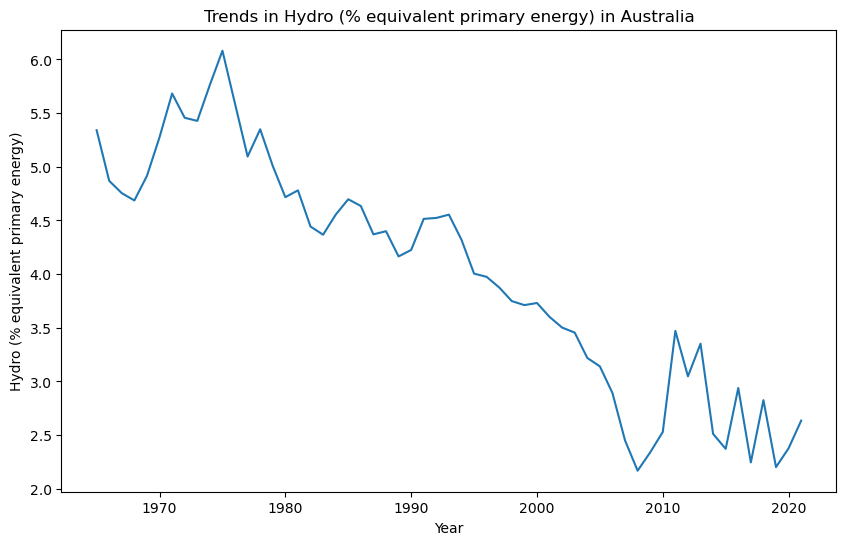

In [24]:
# Plot time series for 'Hydro (% equivalent primary energy)' in Australia
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_australia, x='Year', y='Hydro (% equivalent primary energy)')
plt.title('Trends in Hydro (% equivalent primary energy) in Australia')
plt.show()

**Now Lets perform Predictive Data Analysis using `SARIMA`(Seasonal Autoagressive Integrated Moving Average Model**

To do this, we will be performing several operations related to time series analysis and forecasting. Here's a step-by-step breakdown of what's happening:

Preparing the features and target variables: The code first selects the relevant columns from the dataset and formats the 'Year' column as a datetime object. It then sets 'Year' as the index of the DataFrame, as is common in time series analysis.

Splitting the data into training and testing sets: The data is split based on the year, with data up to and including 2019 used for training, and data from 2020 onwards used for testing.

Defining the SARIMA model parameters: The SARIMA (Seasonal Autoregressive Integrated Moving Average) model is a type of model used for time series forecasting. The 'order' parameter (p, d, q) specifies the autoregressive, differencing, and moving average components of the model, respectively. The 'seasonal_order' parameter (P, D, Q, S) specifies the same components for the seasonal part of the model. In this case, no seasonal component is included.

Creating an empty DataFrame for predictions: An empty DataFrame is created to store the predictions from the model.

Fitting the SARIMA model and making predictions: For each type of energy, the SARIMA model is fitted to the training data, and predictions are made for the length of the testing data plus an additional 10 years. The mean squared error (MSE) between the actual values and the predicted values is calculated and printed.

Plotting the predictions: The predictions for each type of energy are plotted over time. This provides a visual representation of the forecasted trends in energy consumption.

In [30]:
#Importing the stat model algorithm for forecasting

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [31]:
df_australia.columns

Index(['Entity', 'Year', 'Oil (% equivalent primary energy)',
       'Coal (% equivalent primary energy)',
       'Solar (% equivalent primary energy)',
       'Nuclear (% equivalent primary energy)',
       'Hydro (% equivalent primary energy)',
       'Wind (% equivalent primary energy)',
       'Gas (% equivalent primary energy)',
       'Other renewables (% equivalent primary energy)'],
      dtype='object')

In [32]:


# Prepare the features and target variable
df = df_australia[['Year', 'Solar (% equivalent primary energy)']]
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Split the data into training and testing sets
train_data = df[:'2019']
test_data = df['2020':]

# Define the SARIMA model with appropriate parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (0, 0, 0, 0)  # (P, D, Q, S) - No seasonal component for yearly data

# Fit the SARIMA model
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecast future time points
forecast = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")

# Forecast future time points beyond the available data
future_years = 10  # Number of years to forecast
future_forecast = model_fit.forecast(steps=future_years)
print(f"Forecasted values for future years: {future_forecast}")


Mean Squared Error: 0.09236753471910379
Forecasted values for future years: 2020-01-01     3.806378
2021-01-01     4.725335
2022-01-01     5.629822
2023-01-01     6.520068
2024-01-01     7.396297
2025-01-01     8.258729
2026-01-01     9.107582
2027-01-01     9.943070
2028-01-01    10.765403
2029-01-01    11.574788
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7016\631666350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as s

Mean Squared Error for Oil (% equivalent primary energy): 6.004116789157499
Mean Squared Error for Coal (% equivalent primary energy): 3.0386885998153863
Mean Squared Error for Solar (% equivalent primary energy): 0.09236753471910379
Mean Squared Error for Nuclear (% equivalent primary energy): 0.0


c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error for Hydro (% equivalent primary energy): 0.05974550721471182
Mean Squared Error for Wind (% equivalent primary energy): 0.35983410372278773
Mean Squared Error for Gas (% equivalent primary energy): 3.03912220753351
Mean Squared Error for Other renewables (% equivalent primary energy): 0.0025770961277474837


c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


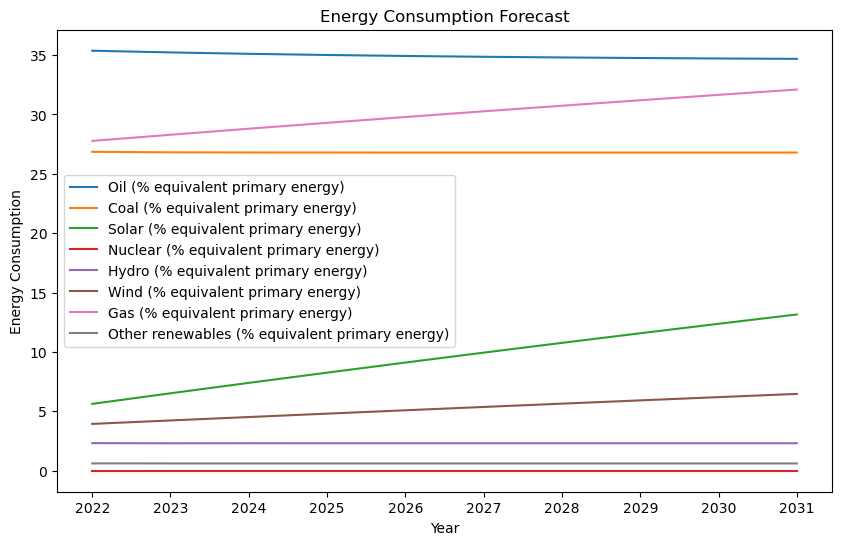

In [33]:

# Prepare the features and target variables
df = df_australia[['Year', 'Oil (% equivalent primary energy)', 'Coal (% equivalent primary energy)', 'Solar (% equivalent primary energy)', 'Nuclear (% equivalent primary energy)', 'Hydro (% equivalent primary energy)', 'Wind (% equivalent primary energy)', 'Gas (% equivalent primary energy)', 'Other renewables (% equivalent primary energy)']].copy()
df.loc[:, 'Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.index.freq = 'AS-JAN'  # Set the frequency of the time series data

# The rest of your code...


# Split the data into training and testing sets
train_data = df[:'2019']
test_data = df['2020':]

# Define the SARIMA model with appropriate parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (0, 0, 0, 0)  # (P, D, Q, S) - No seasonal component for yearly data

# Create an empty DataFrame to store the predictions
predictions = pd.DataFrame(columns=test_data.columns)

# Iterate over each energy type and fit the SARIMA model, make predictions, and evaluate
for column in test_data.columns:
    model = sm.tsa.SARIMAX(train_data[column], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_data) + 10)  # Forecasting for 10 additional years
    mse = mean_squared_error(test_data[column], forecast[:len(test_data)])
    print(f"Mean Squared Error for {column}: {mse}")
    predictions[column] = forecast[-10:]  # Selecting the last 10 years of the forecast

# Plot the predictions
plt.figure(figsize=(10, 6))
for column in predictions.columns:
    plt.plot(predictions.index, predictions[column], label=column)
plt.title("Energy Consumption Forecast")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.show()



## Conclusion

In this notebook, we performed an exploratory data analysis (EDA) and predictive analysis on a given dataset, which contains information about the primary energy consumption worldwide from 1800 to 2021. We have also looked at the energy consumption of `Australia` on its own.

During the EDA, we first loaded the dataset and inspected its structure. We found that the dataset contains 220 rows and 9 columns. Each row represents a year, and each column represents a different type of energy source. We also found that the dataset contains some missing values, which we imputed using forward fill method.

We then performed a descriptive statistical analysis of the dataset, which revealed some interesting insights. For example, we found that the consumption of oil and coal has been increasing over the years, while the consumption of wood has been decreasing. We also found that the consumption of solar and nuclear energy is relatively low compared to other energy sources.

In addition, we have analyzed the trends in the percentage of primary energy equivalent derived from various energy sources over the years. The energy sources we considered include oil, coal, solar power, nuclear power, hydro power, gas, and other renewable sources.

For each energy source, we created a line graph with the years on the x-axis and the percentage of primary energy equivalent from the energy source on the y-axis. Each point on the line represents the percentage of primary energy from the energy source for a specific year.

The purpose of these plots is to visualize how the reliance on each energy source for energy has changed over time. An increasing line indicates that the percentage of primary energy from the energy source is increasing, suggesting a growing reliance on that source. Conversely, a decreasing line indicates a reduction in the reliance on the energy source for energy.

From these plots, we can gain insights into how the energy landscape has evolved over the years and how the importance of different energy sources has changed. This can inform decisions about energy policy and investment in different types of energy infrastructure

Overall, this notebook provides a comprehensive analysis of the primary energy consumption worldwide. The insights gained from this analysis can be useful for policymakers, energy companies, and researchers in understanding the past trends and making informed decisions for the future. 